In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Read the csv file into a pandas DataFrame

combined_df = pd.read_csv('combined_data.csv')
combined_df.head()

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,0.6,18.7,Khalid El-Amin,50,2000,34,6.3,0.030,-3.8,-0.4,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,-0.1,10.6,Mike Smith,17,2000,35,3.0,-0.033,-5.5,-0.2,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [3]:
y = combined_df["class"]

In [4]:
from sklearn.preprocessing import LabelEncoder
y = combined_df["class"]
labels = LabelEncoder()
labels.fit(y)
encoded_y = labels.transform(y)

In [5]:
en_y = encoded_y
combined_df["code"]=en_y
combined_df.head()

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40,code
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821,1
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847,1
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403,1
3,0.6,18.7,Khalid El-Amin,50,2000,34,6.3,0.030,-3.8,-0.4,...,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302,0
4,-0.1,10.6,Mike Smith,17,2000,35,3.0,-0.033,-5.5,-0.2,...,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200,0


In [6]:
encoded_y =encoded_y.reshape(-1, 1)

In [41]:
# Assign the data to X and y
X = combined_df[['true_shooting_percentage', 'height']]
y = combined_df["code"].values.reshape(-1, 1)
print(X.shape, y.shape)

(853, 2) (853, 1)


In [42]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [43]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [44]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.022924659384708668
Testing Score: -0.014474492630277114


Text(0.5, 1.0, 'Residual Plot')

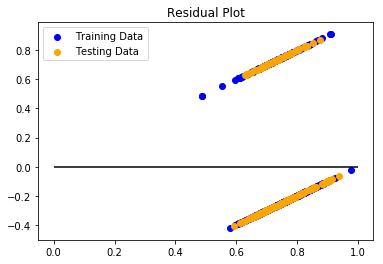

In [45]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.19628577111611048
R-squared (R2 ): 0.019179094882138537


In [47]:
# Overall Score for the model
model.score(X, y)

0.019179094882138537